In [1]:
# if you installed the nico package 

import nico 
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.collections import PatchCollection

# If you did not install the nico package and downloaded the nico scripts into the current directory then use the following imports  
#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.1 #set the value globally

# please use Helvetica font according to your OS to ensure compatibility with Adobe Illustrator. 
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.sans-serif'] = ['Helvetica']

# Use the default font for all the figures 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(nico.__version__)

1.4.0


### Usage introduction 
For details of the function usage and input parameters either refer to the documentation or  <br>
just write the function and add ```.__doc__``` to retrieve infromation on all relelvant parameters.

```print(sann.find_anchor_cells_between_ref_and_query.__doc__)``` <br>
```print(sint.spatial_neighborhood_analysis.__doc__)``` <br>
```print(scov.gene_covariation_analysis.__doc__)``` <br>

All the figures will be saved in ``saveas=pdf`` format as vector graphics by default. <br>
For every function that generates  figures, the following default parameters are used: <br>
transparent_mode=False, saveas='pdf',showit=True, dpi=300 

For saving figures in png format, set saveas='png'  <br>
For generating images without background, set transparent_mode=True <br>
If figure outputs within the Jupyter Notebook is not desired, set showit=False

Please download the sample data from the git repository 
https://github.com/ankitbioinfo/nico_tutorial and <br> keep all the files and folders in the same directory to complete the tutorial. 


Unzip inputRef.zip and inputQuery.zip   <br>
inputRef  (single-cell RNA-sequencing data)  <br>
inputQuery (single-cell resolution spatial transcriptomics data) <br>
NiCoLRdb.txt (Ligand-receptor database file) 

Before running the this notebook, input data need to be prepared by running 
the Start_Data_prep.ipynb notebook <br>
Once all the steps of Start_Data_prep.ipynb are completed, the following commands can be executed to run a complete NiCo analysis. 

In [4]:
#parameters for saving plots
saveas='png'
transparent_mode=False
dpi=300
showit=True

In [5]:
ref_datapath='./inputRef/'
query_datapath='./inputQuery/'



output_nico_dir='./nico_out/'
output_annotation_dir=None #uses default location
#output_annotation_dir=output_nico_dir+'annotations/'
annotation_save_fname= 'nico_celltype_annotation.h5ad'
inputRadius=0

The cell type annotation slot of the scRNA-seq data is assigned to ``ref_cluster_tag`` <br>
For example, in an AnnData object the name of the slot could be adata.obs['cluster'] <br>
In this slot, the cell type annotation of the scRNA-seq data is stored. 

In [6]:
ref_cluster_tag='cluster' #scRNAseq cell type slot 
annotation_slot='nico_ct' #spatial cell type slot 

# Module A: Perform cell type annotation of spatial data 

First find anchored cells between two modalities 


In [7]:
anchors_and_neighbors_info=sann.find_anchor_cells_between_ref_and_query(
refpath=ref_datapath,
quepath=query_datapath,
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir)

### Selection of parameters 
Perform NiCo cell type annotation using the spatial Leiden cluster from the <br> Start_Data_prep.ipynb notebook, 
e.g., with Leiden resolution parameter 0.4  <br>


If you have a large number of cells (>200,000) and want to perform <br>
cell type annotation with different Leiden resolution parameters or <br>
any other parameters, save the output_annotation_dir directory with <br>
a different name for each run.

MNN (Mutual Nearest Neighbors) alignment takes a considerable amount <br>
of time, which can delay the analysis on an ordinary laptop. Therefore, it is <br>
advisable to save the anchors_data_50.npz file, as the anchor information is <br>
independent of the resolution parameter.  

### Availability of annotation slot in scRNA-seq data.  
ref_cluster_tag='cluster' <br>

ref_cluster_tag variable define the cell type slot for the scRNA-seq data. <br>
In this example, the annotation slot in the scRNA-seq data is 'cluster'. <br> 
Example  .obs['cluster']  <br>
If scRNA-seq cell type annotation is stored in another slot then please <br>
change the parameter of "ref_cluster_tag" to your slot name. <br>

### Availability of guiding annotation slot in spatial data. 
guiding_spatial_cluster_resolution_tag='leiden0.4' <br> 

guiding_spatial_cluster_resolution_tag variable define the Leiden clustering slot for the spatial data. <br>
Example .obs['leiden0.4']  <br>
Please change the parameter of "guiding_spatial_cluster_resolution_tag" for the other resolution of Leiden clustering. <br>  


In [8]:
output_info=sann.nico_based_annotation(anchors_and_neighbors_info,
guiding_spatial_cluster_resolution_tag='leiden0.4',
across_spatial_clusters_dispersion_cutoff=0.15,
ref_cluster_tag=ref_cluster_tag,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

This function ``sann.delete_files`` deletes the anchor file details <br>
created in the ``find_anchor_cells_between_ref_and_query`` step.  <br>
If you have a large number of cells and want to experiment with different  <br>
annotation parameters, do not delete this file as it can takes a <br>
significant amount of time to compute. 

In [9]:
sann.delete_files(output_info)

In [10]:
# Visualize the anchor cells between two modalities. 
# sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

### Save the annotation file into AnnData object

Save the annotation file into AnnData object (annotation_save_fname) <br>
along with given expression matrix in "output_nico_dir" directory. 


In [11]:
sann.save_annotations_in_spatial_object(output_info,
anndata_object_name=annotation_save_fname)

Nico cell type cluster are saved in following path './nico_out/' as <anndata>.obs['nico_ct'] slot


## Note: Annotations from different computational methods such cell2location or TACCO 

If you would like to use an available AnnData object with cell type annotations <br>
obtained with a different method, you can skip the previous steps.

To use your own annotations, replace the following file <br>

annotation_save_fname= ‘nico_celltype_annotation.h5ad’  <br> 
replaced with  <br> 
annotation_save_fname= 'other_method_celltype_annotations.h5ad'


The content of the AnnData object is as follows: 

The necessary slots are adata.obs['nico_ct'] or any other slot for cell type annotation,  <br>
adata.obsm['spatial'] for spatial coordinates, <br>
adata.obsm['X_umap'] for 2D umap coordinates, <br>
adata.X is normalized count data, and <br>
adata.raw.X for raw count data. <br>

With this file the remaining tutorial can be finished.

### Visualize the spatial annotations of all cell types 
Left side: tissue map, Right side: UMAP 

The figures are saved:  ./nico_out/annotations/tissue_and_umap_with_all_celltype_annotations.png


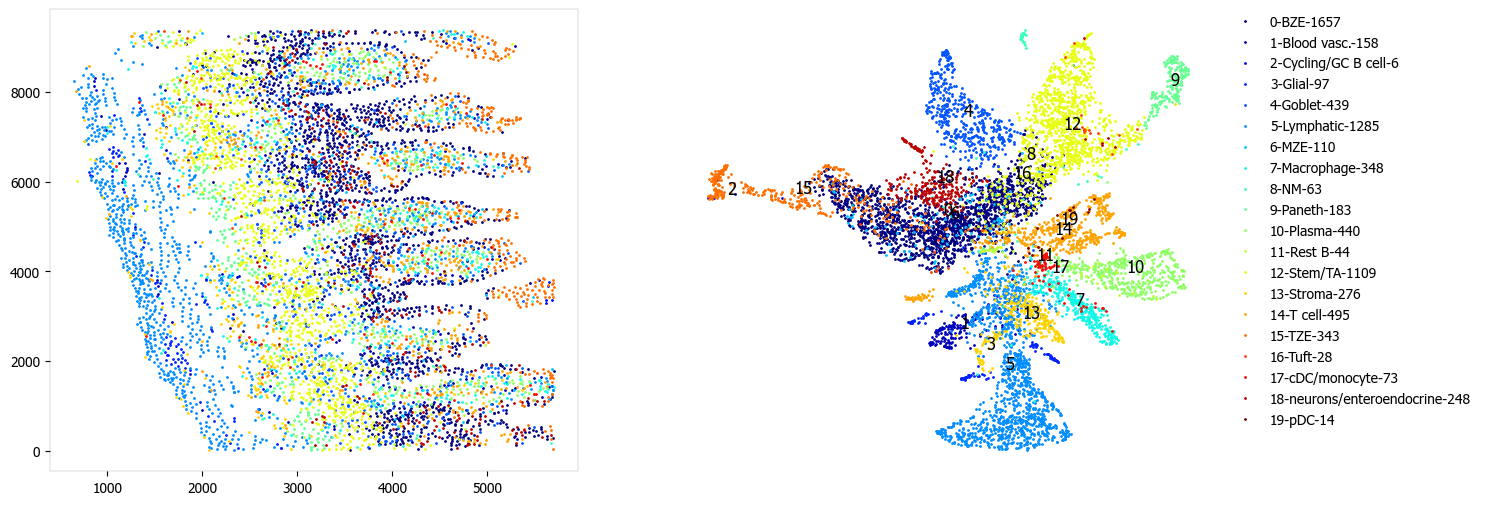

In [12]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes( 
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
#spatial_cluster_tag='nico_ct',
spatial_cluster_tag=annotation_slot,    
spatial_coordinate_tag='spatial',
umap_tag='X_umap',
showit=showit,
saveas=saveas,transparent_mode=transparent_mode)

### Visualize  spatial annotations of selected pairs (or larger sets) of cell types  
Left side: tissue map, Right side: UMAP 

The figures are saved:  ./nico_out/annotations/fig_individual_annotation/Stem_TA0.png
The figures are saved:  ./nico_out/annotations/fig_individual_annotation/Paneth1.png


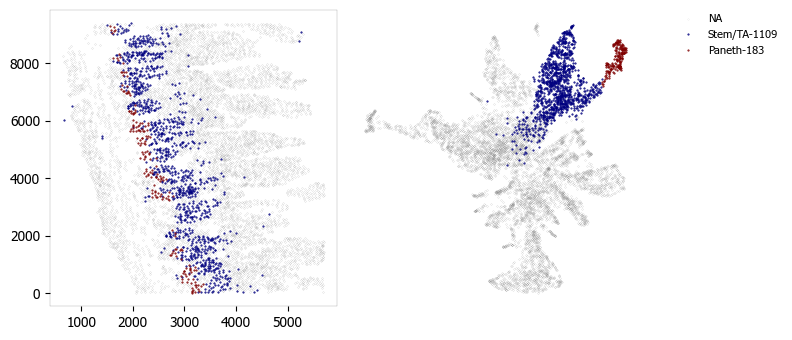

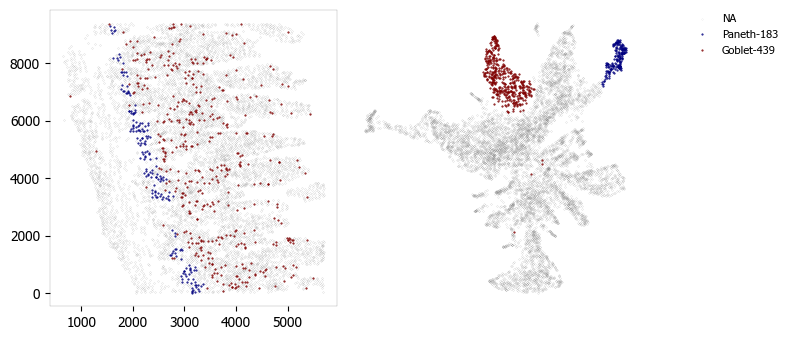

In [13]:
choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]

sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(
choose_celltypes=choose_celltypes,    
output_nico_dir=output_nico_dir,
output_annotation_dir=output_annotation_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag=annotation_slot,spatial_coordinate_tag='spatial',
umap_tag='X_umap',
showit=showit,    
saveas=saveas,transparent_mode=transparent_mode)


In [14]:
# For visualizing every cell type individually, leave list choose_celltypes list empty.  
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Module B: Infer significant niche cell type interactions 

### Radius definition 

If the radius in NiCo is set to R=0, NiCo incorporates the neighboring cells <br>
that are in immediate contact with the central cell to construct the expected <br>
neighborhood composition matrix. We envision NiCo as a method to explore <br>
direct interactions with physical neighbors (R=0), but in principle <br>
finite distance interactions mediated by diffusive factors could be <br>
explored by increasing R and comparing to the interactions obtained with <br>
R=0.

It may be helpful to explore a larger radius if it is expected that cell <br>
types interact through long-range interactions. However, during the <br>
covariation task, immediate neighbors typically capture the strongest <br>
signal, while a larger radius averages the signal from a bigger number of cells, <br> 
potentially diluting the signal. Therefore, we recommend running NiCo with R=0. <br>


Perform  neighborhood analysis across direct neighbors <br> 
(juxtacrine signaling, R=0) of the central niche cell type.   

To exclude cell types from the neighborhood analysis, <br> 
add celltype names to the list removed_CTs_before_finding_CT_CT_interactions. <br>

In the example below, the cell types Basophils, Cycling/GC B cell, <br>
and pDC would not be included in the niche interaction task due to their low abundance. 

In [15]:
do_not_use_following_CT_in_niche=['Basophils','Cycling/GC B cell','pDC']

niche_pred_output=sint.spatial_neighborhood_analysis(
Radius=inputRadius,
output_nico_dir=output_nico_dir,
anndata_object_name=annotation_save_fname,
spatial_cluster_tag='nico_ct',
removed_CTs_before_finding_CT_CT_interactions=do_not_use_following_CT_in_niche)


average neighbors: 4.837038047183963
average distance: 64.09758818509228
data shape (7304, 19) (7304,) neighbor shape (7304, 17)
Searching hyperparameters  Grid method: 0.00390625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.0078125
Searching hyperparameters  Grid method: 0.00390625
Inverse of lambda regularization found 0.00390625
training (5844, 17) testing (1460, 17) coeff (17, 17)


In [16]:
# this cutoff is use for the visualization of cell type interactions network 
celltype_niche_interaction_cutoff=0.1


In some computing environments, pygraphviz is not able to load the neato package automatically. <br>
In such cases, please define the location of the neato package.  <br>
If you install pygraphviz through conda ```conda install -c conda-forge pygraphviz``` <br>
then most likely it should work. 
```
import pygraphviz
a=pygraphviz.AGraph()
a._get_prog('neato')

import os
if  not '/home/[username]/miniforge3/envs/SC/bin/' in os.environ["PATH"]:
    os.environ["PATH"] += os.pathsep + '/home/[username]/miniforge3/envs/SC/bin/'
```

### Example A:  Plot the niche interaction network without any edge weight details for cutoff 0.1 

In the following plot you can reduce the opacity of colors using the `alpha` parameter and change the colormap with `input_colormap`. 
The popoular choice of colormaps are following: 
'summer', 'autumn', 'winter', 'cool', 'Wistia',  'hot', 'afmhot', 'gist_heat', 'copper','Diverging', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gist_rainbow', 'rainbow', 'jet', 'turbo' \
For more detail colormap options, refer to the [matplotlib colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) \



The figures are saved:  ./nico_out/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.png


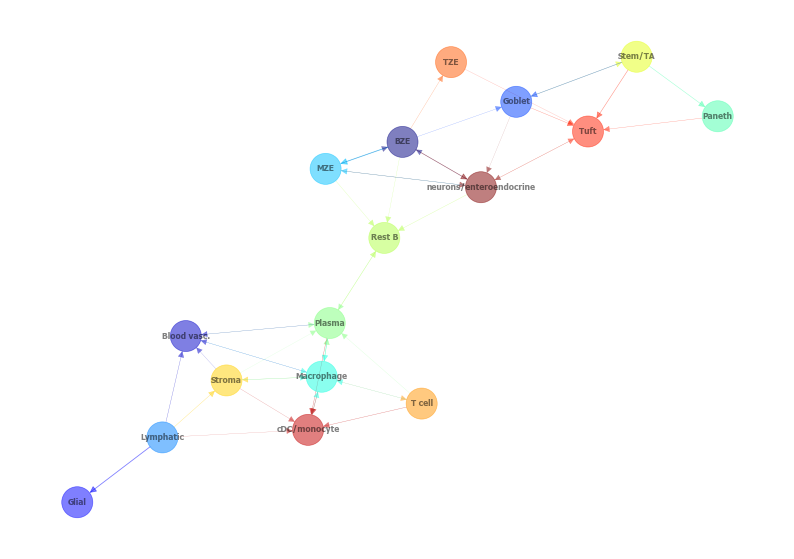

In [17]:
sint.plot_niche_interactions_without_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,                #Resolution in dots per inch for saving the figure.
input_colormap='jet',   #Colormap for node colors, from matplotlib colormaps.
with_labels=True,       #Display cell type labels on the nodes, if True.
node_size=500,          #Size of the nodes. 
linewidths=0.5,         #Width of the node border lines. 
node_font_size=6,       #Font size for node labels.
alpha=0.5,              #Opacity level for nodes and edges. 1 is fully opaque, and 0 is fully transparent. 
font_weight='bold'      #Font weight for node labels; 'bold' for emphasis, 'normal' otherwise. 
)


### Example B: Using edge weights included in the niche interaction plot can be done as shown below


The figures are saved:  ./nico_out/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.png


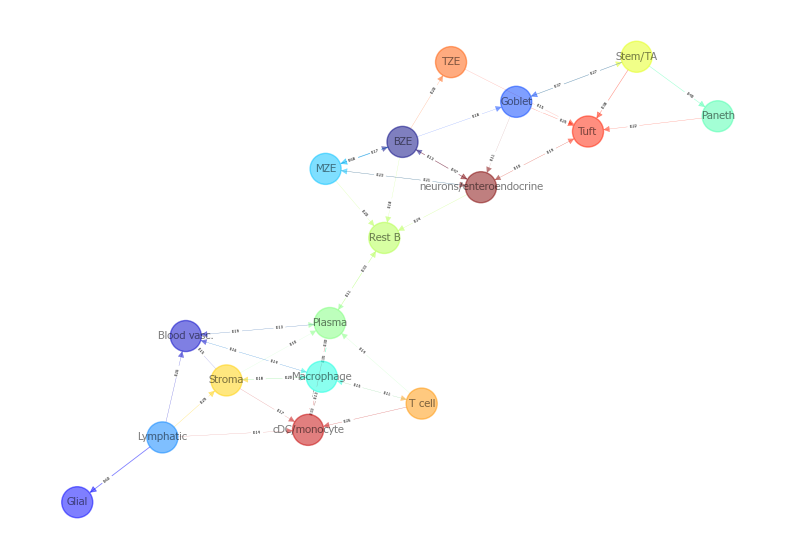

In [18]:
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,
niche_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,
transparent_mode=transparent_mode,
showit=showit,
figsize=(10,7),
dpi=dpi,
input_colormap='jet',
with_labels=True,
node_size=500,
linewidths=1,
node_font_size=8,
alpha=0.5,
font_weight='normal',
edge_label_pos=0.35,   #Relative position of the weight label along the edge. 
edge_font_size=3       #Font size for edge labels.  
)

### Individual cell type niche plot 

To plot regression coefficients of niche cell types for given central cell types, ordered by magnitude, <br>
add cell type names for the desired central cell types to the list argument choose_celltypes (e.g. Stem/TA <br>
and Paneth cells).


The figures are saved:  ./nico_out/niche_prediction_linear/TopCoeff_R0/Rank1_Paneth.png
The figures are saved:  ./nico_out/niche_prediction_linear/TopCoeff_R0/Rank3_Stem_TA.png


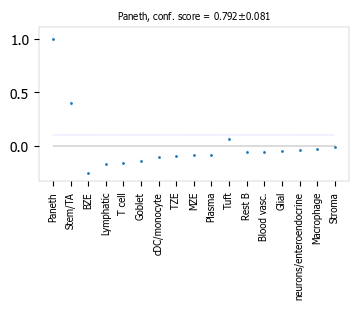

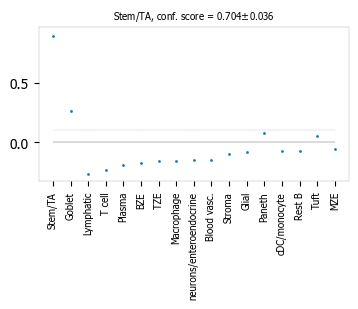

In [19]:
# Blue dotted line in following plot indicates the celltype_niche_interaction_cutoff

sint.find_interacting_cell_types(niche_pred_output,
choose_celltypes=['Stem/TA','Paneth'],
celltype_niche_interaction_cutoff=celltype_niche_interaction_cutoff,
saveas=saveas,transparent_mode=transparent_mode,dpi=dpi,showit=showit,figsize=(4.0,2.0))

If regression coefficients for the niche neighborhoods of all cell <br>
types should be plotted or saved, then leave the choose_celltypes list <br>
argument empty.

In [20]:
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

In [21]:
# Plot the ROC curve of the classifier prediction for one of the cross-folds. 
# sint.plot_roc_results(niche_pred_output,saveas=saveas,transparent_mode=transparent_mode))
# sint.plot_predicted_probabilities(niche_pred_output)


Plot the average confusion matrix of the classifier from cross-folds 

The figures are saved:  ./nico_out/niche_prediction_linear/Confusing_matrix_R0.png


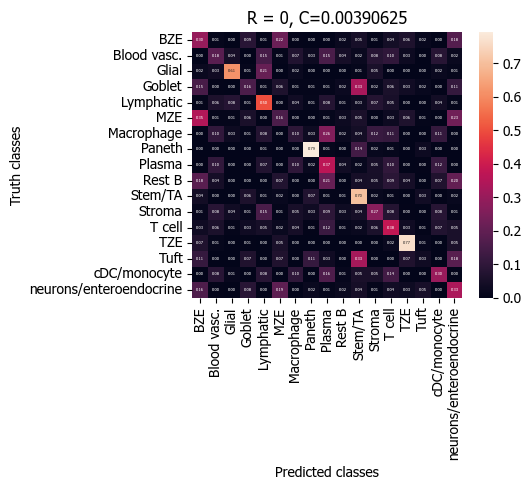

In [22]:
sint.plot_confusion_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,dpi=dpi)

Plot the average coefficient matrix of the classifier from cross-folds 

The figures are saved:  ./nico_out/niche_prediction_linear/weight_matrix_R0.png


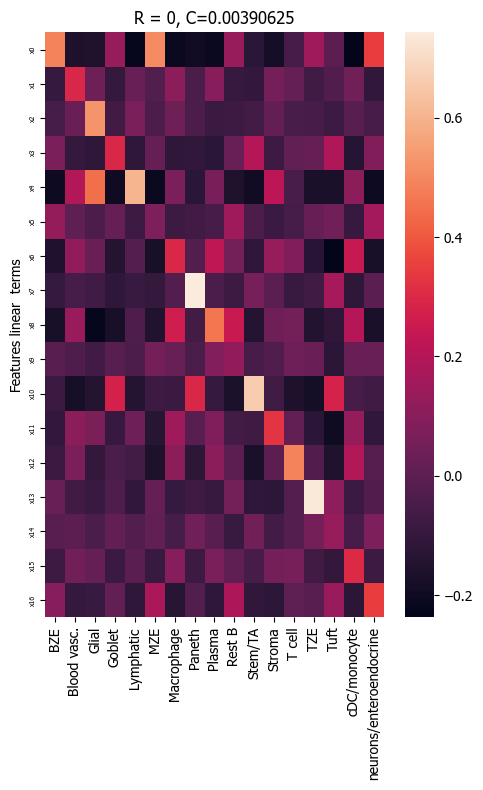

In [23]:
sint.plot_coefficient_matrix(niche_pred_output,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,dpi=dpi)

Plot the evaluation score of the classifier for different metrics 

The figures are saved:  ./nico_out/niche_prediction_linear/scores_0.png


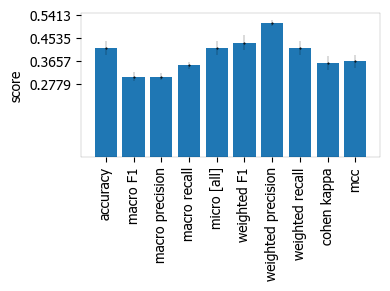

In [24]:
sint.plot_evaluation_scores(niche_pred_output, 
saveas=saveas, transparent_mode=transparent_mode,showit=showit,dpi=dpi, 
figsize=(4,3))

# Module C: Perform niche cell state covariation analysis using latent factors

Note: From module C onwards, Jupyter cells are independent of previous steps. <br>
Therefore, if you want to try different settings, you do not need to run the previous Jupyter cells.

### Covariations parameters settings 
Infer desired number of latent factors (e.g., no_of_factors=3) for each <br>
cell type from both modalities using integrated non-negative matrix <br>
factorization. Set iNMFmode=False for applying the conventional <br>
non-negative matrix factorization method. In this case, latent factors <br>
will be derived from the scRNA-seq data and transfered to the spatial <br>
modality.

This option is preferable if spatial data are affected by substantial <br>
technical noise due to unspecific background signal or gene expression <br>
spill-over between neighboring cell types due to imperfect segmentation.

### Ligand-Receptor database file 
NiCoLRdb.txt is the name of the ligand-receptor database file. Users can <br>
use databases of similar format from any resource.

NiCoLRdb.txt was created by merging ligand-receptor pairs from NATMI, <br>
OMNIPATH, and CellPhoneDB. It can be downloaded from github <br>
and saved in the local directory from where this notebook is run.


In [25]:
# By default, the function is run with spatial_integration_modality='double', i.e. 
# it integrates spatial transcriptomics with scRNAseq data

cov_out=scov.gene_covariation_analysis(iNMFmode=True,
        Radius=inputRadius,
        no_of_factors=3,
        refpath=ref_datapath,
        quepath=query_datapath,
        spatial_integration_modality='double',
        output_niche_prediction_dir=output_nico_dir,
        ref_cluster_tag=ref_cluster_tag,LRdbFilename='NiCoLRdb.txt')

common genes between sc and sp 203 203


 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'Macrophage', 'Blood vasc.', 'cDC/monocyte', 'Goblet', 'T cell', 'neurons/enteroendocrine', 'TZE', 'Paneth', 'Tuft', 'BZE', 'Glial', 'MZE', 'Rest B', 'Lymphatic', 'Plasma', 'Stem/TA', 'Stroma'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, if any spatial cell type does not exist in the scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 



Blood vasc. alpha, H size, W size, spH size: 8 (3, 33) (58, 3) (3, 158)
Glial alpha, H size, W size, spH size: 2 (3, 10) (44, 3) (3, 97)
Goblet alpha, H size, W size, spH size: 12 (3, 216) (128, 3) (3, 439)
MZE alpha, H size, W size, spH size: 22 (3, 63) (58, 3) (3, 110)
Macrophage alpha, H size, W size, spH size: 20 (3, 89) (113, 3) (3, 348)
Plasma alpha, H size, W size, spH

In [26]:
#cov_out.save_reg_coef 

In [27]:
import pandas as pd 

In [28]:
'''
To be specific, I would like to plot one factor in central cell type A versus another factor in the 
neighboring cell type B across all niche instances of (A,B). Could you please provide some sample code for this?
Thanks a lot for your help!
'''
def get_data_of_neighboring_nich_instance(Xlabel, Xdata, neighborCT,no_of_factors):
    flag=0
    n=Xdata.shape[1]
    for i in range(0,n,no_of_factors):
        ii=int(i/no_of_factors)
        if Xlabel[ii]==neighborCT:
            flag=1
            neighboring_niche_data=Xdata[:,i:i+no_of_factors]
        #print(Xlabel[ii],Xdata[:,i:i+no_of_factors].shape)
    if flag==0:
        print('neighbor cell type do not exist')

    return neighboring_niche_data


central_celltype='Paneth'
neighborhood_celltype='Stem/TA'
central_celltype_FAid=3
neighborhood_celltype_FAid=2

no_of_factors=3         
output_nico_dir='./nico_out/'
#read cell type ID information 
df=pd.read_csv(output_nico_dir+'used_CT.txt',sep='\t',header=None)
df.columns = ['cell_type_id', 'cell_type_name', 'freq']
df['cell_type_name']==central_celltype

central_celltype_id = df.loc[df['cell_type_name'] == central_celltype, 'cell_type_id'].iloc[0]
print("ID of central cell type",central_celltype_id)

CC_data_allinfo=cov_out.save_reg_coef[central_celltype_id]
#information stored in CC_data in following order 
#[coef,intercept,alpha,xlabel,score,target,neighborhoodClass,pv,percent_variance_explained,residual_variance_explained]


#dependent variable / response / target
CC_data=CC_data_allinfo[5]
CC_data_Xaxis=CC_data_allinfo[6]
CC_data_Xlabel=CC_data_allinfo[3]
print("Central cell feature", CC_data.shape, CC_data_Xaxis.shape, CC_data_Xlabel)

#independent variable / predictor / feature   
NC_data=get_data_of_neighboring_nich_instance(CC_data_Xlabel, CC_data_Xaxis, neighborhood_celltype,no_of_factors)  
print("Neighborhood cell feature", NC_data.shape)

ID of central cell type 7
Central cell feature (183, 3) (183, 9) ['Paneth' 'Stem/TA' 'Tuft']
Neighborhood cell feature (183, 3)


Text(0, 0.5, 'Stem/TA_Fa2')

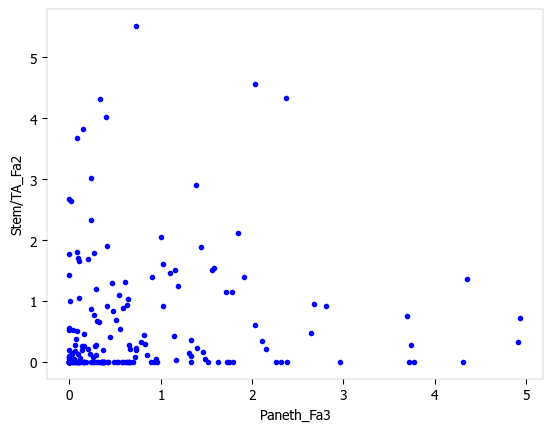

In [29]:
plt.plot(CC_data[:,central_celltype_FAid-1], NC_data[:,neighborhood_celltype_FAid-1],'b.')
plt.xlabel(central_celltype +'_Fa'+str(central_celltype_FAid))
plt.ylabel(neighborhood_celltype + '_Fa'+str(neighborhood_celltype_FAid))

In [30]:
hello

NameError: name 'hello' is not defined

### Visualize the cosine similarity and Spearman correlation between genes and latent factors 

The following function generates output for the top 30 genes based on cosine <br>
similarity (left) or Spearman correlation (right) with latent factors.

Select cell types by adding IDs to the list argument choose_celltypes, or <br>
leave empty for generating output for all cell types.

In [ ]:
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Paneth'],
NOG_Fa=30,saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(15,10),dpi=dpi)

In [ ]:
# Cosine and spearman correlation: visualize the correlation of genes from NMF
scov.plot_cosine_and_spearman_correlation_to_factors(cov_out,
choose_celltypes=['Stem/TA'],
NOG_Fa=30,saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(15,10),dpi=dpi)

### Visualizes genes associated with the latent factors along with average expression
Call the following function <br>
(scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype) to <br>
visualize correlation and expression of genes associated with factors.

For example, visualize and extract the top 20 genes (top_NOG=20) <br>
correlating negatively (positively_correlated=False) by Spearman <br>
correlation (correlation_with_spearman=True) for cell type Stem/TA <br>
(choose_celltype=‘Stem/TA’) to factor 1 (choose_factor_id=1)


In [ ]:
dataFrame=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(
cov_out,
choose_celltype='Stem/TA',
choose_factor_id=1,
top_NOG=20,
correlation_with_spearman=True,
positively_correlated=False,dpi=dpi,showit=showit,
saveas=saveas,transparent_mode=transparent_mode )

### Inspect genes associated with a latent factor
Inspect the top genes associated with a the given factor. The table summarizes the <br>
positive or negative spearman correlation or cosine similarity with the factor, the mean <br>
expression and the proportion of cells expressing the gene for the respective cell type.


In [ ]:
dataFrame

### Save the latent factors into an excel sheet
Save data in an excel sheet for each cell type, including latent factor <br>
associations of all genes according to Spearman correlation and cosine <br>
similarity.

In [ ]:
scov.make_excel_sheet_for_gene_correlation(cov_out)

# Module D: Cell type covariation visualization

Plot linear regression coefficients between factors of the central cell type (y-axis, <br>
defined by list argument choose_celltypes) and factors of niche cell types (x-axis). <br>

Circle size scales with -log10(p-value) (indicated as number on top of <br>
each circle). To generate plots for all cell types, leave list argument <br>
choose_celltypes empty.


In [ ]:
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=choose_celltypes, 
mention_pvalue=True,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(6,1.25))


In the following example, a p-value cutoff is explicitely defined by the <br>
pvalue_cutoff argument and -log10(p-value) is not printed on top of the <br>
circles.

In [ ]:
choose_celltypes=['Stem/TA']

scov.plot_significant_regression_covariations_as_circleplot(cov_out,
choose_celltypes=choose_celltypes,
pvalue_cutoff=0.05,mention_pvalue=False,dpi=dpi,
saveas=saveas,transparent_mode=transparent_mode,showit=showit,
figsize=(6,1.25))


In [ ]:
#function to print the sizebar of pvalue circle size  


def print_pvalue_sizebar(number_of_dots_to_print=3, gray_level=0.5,
savepath='./',saveas='pdf',showit=True,
transparent_mode=False,dpi=300):

    if number_of_dots_to_print==3:
        value2print=[10,6,2]
        width=0.8
        shift=0.15
    if number_of_dots_to_print==5:
        value2print=[10,8,6,4,2]
        width=0.639
        shift=0.25
    if number_of_dots_to_print==4:
        value2print=[10,7.5,5,2.5]
        width=0.725
        shift=0.2
    fig, ax = plt.subplots(1,1,figsize=(width,1.25))
    pvalue=np.zeros((len(value2print),1))
    c=np.ones((len(value2print),1))
    for i in range(len(value2print)):
        pvalue[i][0]=value2print[i]
    M=pvalue.shape[1]
    N=pvalue.shape[0]
    x, y = np.meshgrid(np.arange(M), np.arange(N))
    R = pvalue/10.0/2
    maxp=pvalue.max()
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap='gray',alpha=gray_level)#cmap="RdYlGn")
    ax.add_collection(col)
    ax.set_axis_off()
    ax.set(xticks=np.arange(M), yticks=np.arange(N))
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')
    for i in range(len(value2print)):
        ax.text(0.5,i-shift,str(value2print[i]))
    
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    fig.tight_layout()
    #print(saveas,savepath+'pvalue_cirlce_sizebar'+saveas)
    fig.savefig(savepath+'pvalue_cirlce_sizebar.'+saveas,bbox_inches='tight',transparent=transparent_mode, dpi=dpi)
    if showit:
        pass
    else:
        plt.close('all')



In [ ]:
print_pvalue_sizebar(number_of_dots_to_print=4,gray_level=0.5,savepath=output_nico_dir,
saveas='pdf',transparent_mode=transparent_mode,showit=showit,dpi=dpi)

### Visualize as heatmap instead of circle plot 

Plot regression coefficients between niche cell types (x-axis) and central cell <br>
type (y-axis, defined by list argument choose_celltypes) as heatmap. 

Leave list argument choose_celltypes empty to generate plots for all <br>
cell types. The top subfigure shows the coefficients and bottom subfigure <br>
shows the -log10 p-values.

In [ ]:
scov.plot_significant_regression_covariations_as_heatmap(cov_out,
choose_celltypes=['Stem/TA'],dpi=dpi,showit=showit,
saveas=saveas,transparent_mode=transparent_mode, figsize=(6,1.25))

# Module E: Analysis of ligand-receptor interactions between covarying niche cell types

### Save excel sheets and summary in text file  
Save all ligand-receptor interactions infered for the niche of each cell <br>
type in an excel sheet, and a summary of significant niche <br>
interactions in a text file.

In [ ]:
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(cov_out,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.1,LR_plot_Exp_thres=0.1,number_of_top_genes_to_print=5)


### Usage for ligand receptor visualizations 
Perform ligand-receptors analysis. In this example, output is generated <br>
for the ligand-receptor pairs associated with the interacting factor 1 of <br>
Stem/TA cells and factor 1 of Paneth cells.

choose_interacting_celltype_pair=[‘Stem/TA’,‘Paneth’]

choose_factors_id=[1,1] entries correspond to cell types in <br>
choose_interacting_celltype_pair, i.e., first factor ID corresponds to <br>
Stem/TA and second factor ID corresponds to Paneth.

By default, the analysis is saved in 3 separate figures (bidirectional, <br>
CC to NC and NC to CC). CC: central cell NC: niche cell

Our analysis accounts for bidirectional cellular crosstalk interactions <br>
of ligands and receptors in cell types A and B. The ligand can be <br>
expressed on cell type A and signal to the receptor detected on cell <br>
type B, or vice versa.

By changing the cutoff for minimum factor correlation of ligand/receptor <br>
genes (LR_plot_NMF_Fa_thres=0.2) or the cutoff for the minimum fraction <br>
of cells expressing the ligand/receptor genes (LR_plot_Exp_thres=0.2) <br>
the stringency of the output filtering can be controled.


In [ ]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
choose_factors_id=[2,1],
pvalueCutoff=0.05,
LR_plot_NMF_Fa_thres=0.3,
LR_plot_Exp_thres=0.2,dpi=dpi,showit=showit,
saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))


Perform ligand-receptors analysis of the Paneth cell niche including all
significant interaction partners.

choose_interacting_celltype_pair=[‘Paneth’] generates plots for all cell
types interacting sigificantly with Paneth cells. 

choose_factors_id=[] if empty, generate plots for all significantly covarying factors.


In [ ]:
scov.find_LR_interactions_in_interacting_cell_types(cov_out,
choose_interacting_celltype_pair=['Paneth'],
choose_factors_id=[], 
LR_plot_NMF_Fa_thres=0.15,
LR_plot_Exp_thres=0.15,dpi=dpi,showit=showit,
saveas=saveas,transparent_mode=transparent_mode,figsize=(12, 10))


# Module F: Perform functional enrichment analysis for genes associated with latent factors 

### Example 1: Perform pathway enrichment analysis for factor-associated genes

In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, positively correlated <br>
(positively_correlated=True) with factor 2 (choose_factors_id=[2]) of <br>
Stem/TA cells (choose_celltypes=[‘Stem/TA’]) testing for enrichment of <br>
GO Biological Processes (database=[‘GO_Biological_Process_2021’]).

If savefigure=True, then the figures will be saved in the respective <br>
folder.

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
savefigure=False,
positively_correlated=True,
saveas=saveas,
rps_rpl_mt_genes_included=False,
display_plot_as='dotplot',
correlation_with_spearman=True,
circlesize=12,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
fontsize=12,
showit=showit,
input_colormap='viridis')

### Example 2: increase the size of dot 

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
savefigure=False,
positively_correlated=True,
saveas=saveas,
rps_rpl_mt_genes_included=False,
display_plot_as='dotplot',
correlation_with_spearman=True,
circlesize=20,
database=['GO_Biological_Process_2021'],
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
fontsize=12,
showit=showit,
input_colormap='viridis')

### Example 3: instead of dotplot show as a barplot 

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
saveas=saveas,
choose_factors_id=[2],
positively_correlated=True,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Combined Score',
showit=showit,
savefigure=False,
input_colormap='hot_r')

## Example 4 (Recommended version):  We recommend using the following version of the plot  

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=True,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,
savefigure=False,
saveas=saveas,
input_colormap='hot_r')

### Example 5
In this example, pathway analysis is performed for the top 50 <br>
(NOG_pathway=50) genes, negatively correlated <br>
(positively_correlated=False) with factor 2 (choose_factors_id=[2]) of <br>
Stem/TA cells (choose_celltypes=[‘Stem/TA’]) testing for enrichment of <br>
GO Biological Processes (database=[‘GO_Biological_Process_2021’]).

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Stem/TA'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
rps_rpl_mt_genes_included=False,
display_plot_as='barplot',
correlation_with_spearman=True,
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,saveas=saveas,
input_colormap='hot_r')

### Example 6 
In this example, pathway analyses are performed for the top 50 <br>
(NOG_pathway=50) genes, positively correlated <br>
(positively_correlated=True) with any factor (choose_factors_id=[]) of <br>
Paneth cells (choose_celltypes=[‘Paneth’]), ribosome and mitochondrial <br>
genes are not included in the gene list testing for enrichment of <br>
pathways from three databases (GO_Biological_Process_2021, BioPlanet_2019, Reactome_2016).



In [ ]:
'''
scov.pathway_analysis(cov_out,
choose_celltypes=['Paneth'],
NOG_pathway=50,
choose_factors_id=[1],
positively_correlated=True,
savefigure=False, 
rps_rpl_mt_genes_included=False,
#database=['GO_Biological_Process_2021'], #database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Adjusted P-value',
object_for_xaxis='Odds Ratio',
showit=showit,saveas=saveas,
input_colormap='hot_r')
'''

### Example 7 
In this example, pathway analysis is performed for negatively correlated <br>
(positively_correlated=False) with factor 2 (choose_factors_id=[2]) of <br>
Goblet cells (choose_celltypes=[‘Goblet’]) testing for enrichment of <br>
BioPlanet pathways (database=[‘BioPlanet_2019’]).
Object_for_color='Odds Ratio' and 
Object_for_xaxis='Adjusted P-value' 

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Goblet'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
savefigure=False,
rps_rpl_mt_genes_included=False,
database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Odds Ratio',#columntag  P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,
object_for_xaxis= 'Adjusted P-value',#Odds Ratio', #'Combined Score'
showit=showit,saveas=saveas,
input_colormap='hot_r')

### Example 8
Object_for_color='Combined Score' and Object_for_xaxis='P-value'

In [ ]:
scov.pathway_analysis(cov_out,
choose_celltypes=['Goblet'],
NOG_pathway=50,
choose_factors_id=[2],
positively_correlated=False,
savefigure=False,
rps_rpl_mt_genes_included=False,
database=['BioPlanet_2019'],
display_plot_as='barplot',
object_for_color='Combined Score',#columntag  P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,
object_for_xaxis= 'P-value',#Odds Ratio', #'Combined Score'
showit=showit,saveas=saveas,
input_colormap='hot_r')

# Module G: Visualization of top genes across cell types and factors as dotplot

Show the top 20 positively and negatively correlated genes (top_NOG=20) <br>
for all latent factors and the average expression of these genes on a <br>
log scale in a single plot. In this example, plots are generated for <br>
Paneth and Stem/TA cells.

If choose_celltypes=[], the plot will be generated for all cell <br>
types.

In [ ]:
scov.plot_top_genes_for_a_given_celltype_from_all_factors(
cov_out,choose_celltypes=['Paneth','Stem/TA'],
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode,showit=showit)
                        

In [ ]:
scov.plot_top_genes_for_pair_of_celltypes_from_two_chosen_factors(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
visualize_factors_id=[2,1],
top_NOG=20,saveas=saveas,transparent_mode=transparent_mode,showit=showit)

# Module H: Visualize factor values in the UMAP

Visualize factor values for select cell types, e.g., Stem/TA and Paneth <br>
cells (choose_interacting_celltype_pair=[‘Stem/TA’,‘Paneth’]) in <br>
scRNA-seq data umap. Select factors for each cell type <br>
(visualize_factors_id=[1,1]).

List entries correspond to cell types in <br>
choose_interacting_celltype_pair.



In [ ]:
scov.visualize_factors_in_scRNAseq_umap(cov_out,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
visualize_factors_id=[1,1],
saveas=saveas,transparent_mode=transparent_mode,showit=showit,figsize=(8,3.5))

Visualize factor values for select cell types, e.g., Stem/TA and Paneth cells <br>
(choose_interacting_celltype_pair=['Stem/TA','Paneth']) in the spatial transcriptomics data UMAP. <br>
Select factors for each cell type (visualize_factors_id=[1,1]). <br>
List entries correspond to cell types in choose_interacting_celltype_pair.




In [ ]:
scov.visualize_factors_in_spatial_umap(cov_out,
visualize_factors_id=[1,1],
choose_interacting_celltype_pair=['Stem/TA','Paneth'],
saveas=saveas,transparent_mode=transparent_mode,showit=showit, 
figsize=(8,3.5))


In [ ]:
#For visualization of one cell type at a time only 


scov.visualize_factors_in_spatial_umap(cov_out, 
visualize_factors_id=[2],
choose_interacting_celltype_pair=['Stem/TA'],
saveas=saveas,transparent_mode=transparent_mode,figsize=(4,3.5))

scov.visualize_factors_in_scRNAseq_umap(cov_out,
#refpath=ref_datapath,
choose_interacting_celltype_pair=['Stem/TA'],
visualize_factors_id=[2],
saveas=saveas,transparent_mode=transparent_mode,showit=showit, 
figsize=(4,3.5))
